# Clustering

## 1. Importing libraries and data 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
os.environ['OMP_NUM_THREADS'] = '2'
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [3]:
path = 'C:/Users/skhra/DataAnalytics/THE_Rating'

In [4]:
df = pd.read_csv(os.path.join(path, '02-Data', 'PreparedData', 'THE_prepared.csv'))

In [5]:
df.head(5)

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year
0,1.0,California Institute of Technology,United States,2243.0,6.9,26%,33 : 67,95.2,95.6,97.6,99.8,97.8,64.0,2016
1,2.0,University of Oxford,United Kingdom,19920.0,11.6,34%,46:54:00,94.2,86.5,98.9,98.8,73.1,94.4,2016
2,3.0,Stanford University,United States,15596.0,7.8,22%,42:58:00,93.9,92.5,96.2,99.9,63.3,76.3,2016
3,4.0,University of Cambridge,United Kingdom,18810.0,11.8,34%,46:54:00,92.8,88.2,96.7,97.0,55.0,91.5,2016
4,5.0,Massachusetts Institute of Technology,United States,11074.0,9.0,33%,37 : 63,92.0,89.4,88.6,99.7,95.4,84.0,2016


In [6]:
# Droping non-numerical columns
df = df.drop(columns = ['Rank','Name', 'Country', 'International Students', 'Female to Male Ratio', 'Year'])

In [7]:
df.describe()

,Student Population,Students to Staff Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
count,1.452200e+04,14522.000000,14522.000000,14522.000000,14522.000000,14522.000000,14522.000000,14522.000000
mean,2.314897e+04,18.827283,35.464225,28.540070,23.935326,49.566768,46.656204,47.911252
std,3.377055e+04,16.219652,16.760702,13.986913,17.412856,27.164181,19.942360,22.823677
min,2.500000e+01,0.300000,8.222500,8.200000,0.800000,0.700000,0.000000,7.100000
25%,9.973000e+03,12.300000,22.165625,18.800000,11.600000,25.500000,34.900000,28.800000
50%,1.762750e+04,16.300000,32.563750,24.500000,17.900000,48.200000,39.600000,43.600000
75%,2.901475e+04,22.000000,45.174125,33.900000,30.300000,72.800000,54.800000,63.700000
max,1.824383e+06,865.800000,98.477500,99.200000,100.000000,100.000000,100.000000,100.000000


In [8]:
# Normalizing column values so that the maximum value is ~100

In [9]:
df['Student Population'] = df['Student Population']/1824383*100
df['Students to Staff Ratio'] = df['Students to Staff Ratio']/865.8*100

In [10]:
df.head(5)

,Student Population,Students to Staff Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
0,0.122946,0.796951,95.2,95.6,97.6,99.8,97.8,64.0
1,1.091876,1.339801,94.2,86.5,98.9,98.8,73.1,94.4
2,0.854864,0.900901,93.9,92.5,96.2,99.9,63.3,76.3
3,1.031034,1.362901,92.8,88.2,96.7,97.0,55.0,91.5
4,0.607000,1.039501,92.0,89.4,88.6,99.7,95.4,84.0


In [11]:
df.describe()

,Student Population,Students to Staff Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
count,14522.000000,14522.000000,14522.000000,14522.000000,14522.000000,14522.000000,14522.000000,14522.000000
mean,1.268866,2.174553,35.464225,28.540070,23.935326,49.566768,46.656204,47.911252
std,1.851067,1.873372,16.760702,13.986913,17.412856,27.164181,19.942360,22.823677
min,0.001370,0.034650,8.222500,8.200000,0.800000,0.700000,0.000000,7.100000
25%,0.546651,1.420651,22.165625,18.800000,11.600000,25.500000,34.900000,28.800000
50%,0.966217,1.882652,32.563750,24.500000,17.900000,48.200000,39.600000,43.600000
75%,1.590387,2.541003,45.174125,33.900000,30.300000,72.800000,54.800000,63.700000
max,100.000000,100.000000,98.477500,99.200000,100.000000,100.000000,100.000000,100.000000


### 2. The elbow technique

In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [13]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-35477838.81025779,
 -19246676.294178773,
 -14709926.014012355,
 -12716158.574981518,
 -10967908.64781328,
 -9916299.721405791,
 -8816082.646807976,
 -8151620.819786988,
 -7726643.765403368]

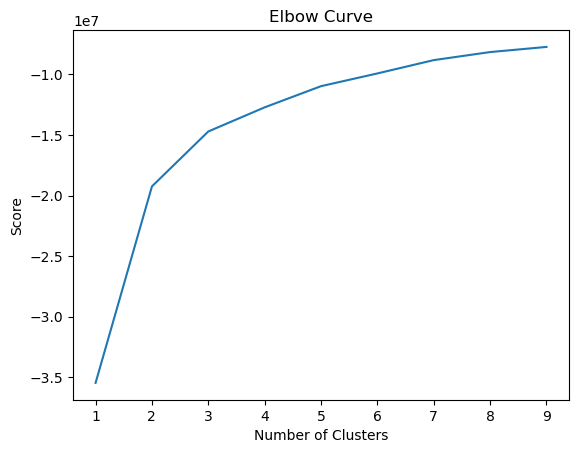

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### In this case, the crossover is relatively smooth. Visually, 3 seems reasonable to take as the number of clusters. Actually, I started with 5 and 4 clusters, but observed that 3 gives more clear and consistent picture.

### 3. k-means clustering

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [16]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [17]:
df['clusters'] = kmeans.fit_predict(df)

In [18]:
df.head(10)

,Student Population,Students to Staff Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,clusters
0,0.122946,0.796951,95.2,95.6,97.6,99.8,97.8,64.0,1
1,1.091876,1.339801,94.2,86.5,98.9,98.8,73.1,94.4,1
2,0.854864,0.900901,93.9,92.5,96.2,99.9,63.3,76.3,1
3,1.031034,1.362901,92.8,88.2,96.7,97.0,55.0,91.5,1
4,0.607000,1.039501,92.0,89.4,88.6,99.7,95.4,84.0,1
5,1.104593,1.027951,91.6,83.6,99.0,99.8,45.2,77.2,1
6,0.434613,0.970201,90.1,85.1,91.9,99.3,52.1,78.5,1
7,0.825485,1.351351,89.1,83.3,88.5,96.7,53.7,96.0,1
8,0.996392,1.697852,88.3,77.0,95.0,91.1,80.0,97.9,1
9,0.779496,0.796951,87.9,85.7,88.9,99.2,36.6,65.0,1


In [19]:
df['clusters'].value_counts()

clusters
2    6445
0    5398
1    2679
Name: count, dtype: int64

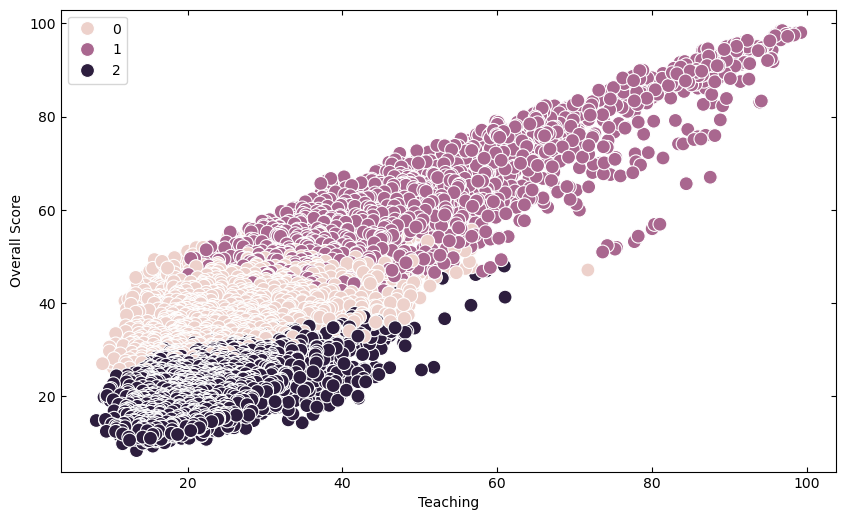

In [20]:
# Plot the clusters for the "Overall Score" and "Teaching" variables.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df['Teaching'], y=df['Overall Score'], hue=kmeans.labels_, s=100) 
# Here, `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Teaching') # Label x-axis.
plt.ylabel('Overall Score') # Label y-axis.
plt.tick_params(direction='in', top=True, right=True)
plt.show()

Three clusters can be easily identified. Cluster 2 corresponds to highly ranked Universities, where the overall score and teaching quality reaches highest values. Cluster 1 corresponds to low-ranked universities, with teaching quality mostly below 60 and rank below 40. Cluster 0 corresponds to medium ranked universities with teaching quality similar to Cluster 1, but overall score in the range mostly between 25 and 50, higher than that of 1, due to other parameters.  

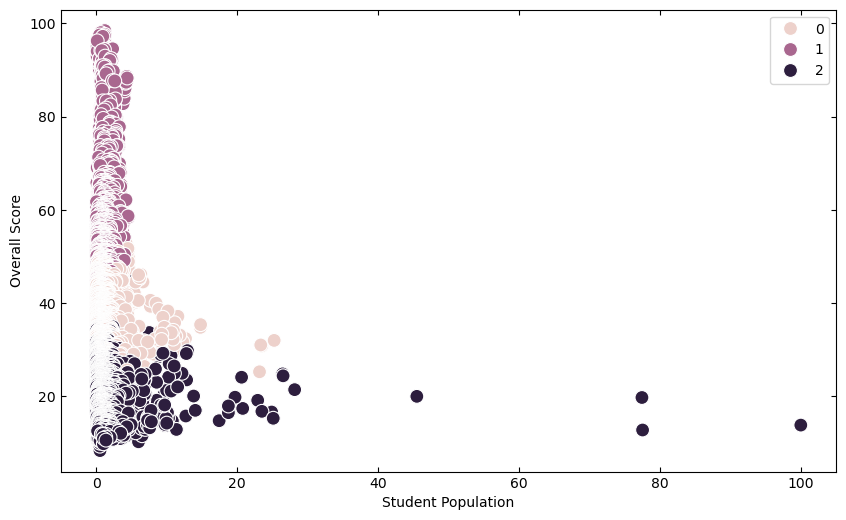

In [21]:
# Plot the clusters for the "Overall Score" and "Student Population" variables.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df['Student Population'], y=df['Overall Score'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Student Population') 
plt.ylabel('Overall Score') 
plt.tick_params(direction='in', top=True, right=True)
plt.show()

#### This shows that student population has no effect on the University rank. Extremely high student populations (big Universities correspond to cluster 1, that is to low-ranked universities)

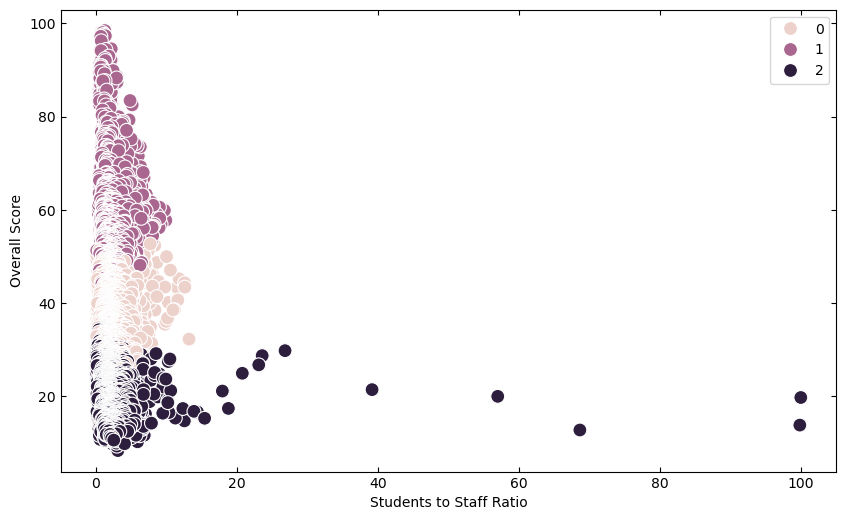

In [22]:
# Plot the clusters for the "Overall Score" and "Students to Staff Ratio" variables.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df['Students to Staff Ratio'], y=df['Overall Score'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Students to Staff Ratio') 
plt.ylabel('Overall Score') 
plt.tick_params(direction='in', top=True, right=True)
plt.show()

#### The conclusion is the same as in the previous figure

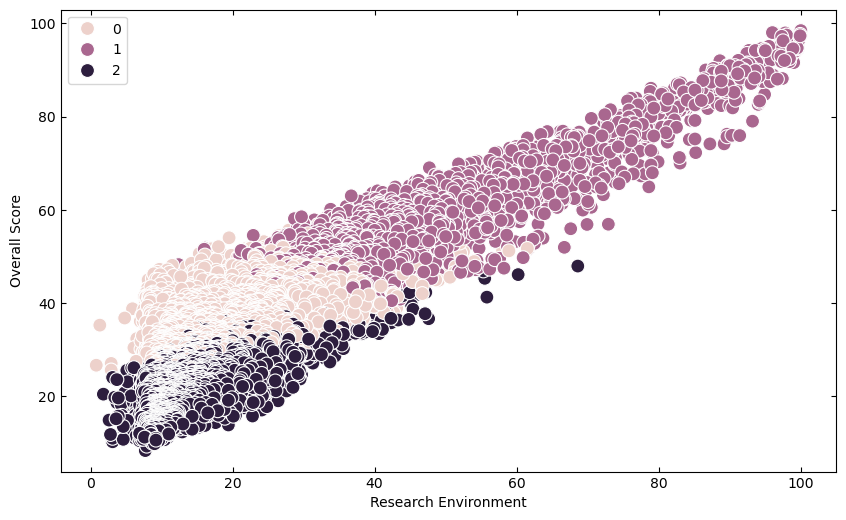

In [23]:
# Plot the clusters for the "Overall Score" and "Research Environment" variables.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df['Research Environment'], y=df['Overall Score'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Research Environment') 
plt.ylabel('Overall Score') 
plt.tick_params(direction='in', top=True, right=True)
plt.show()

#### Only the universities with highest research environment can reach high ranking (Cluster 2)

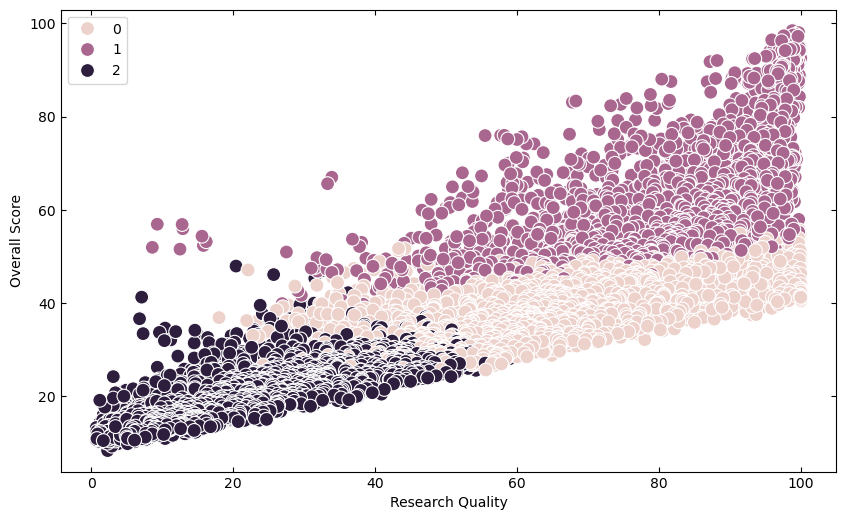

In [24]:
# Plot the clusters for the "Overall Score" and "Research quality" variables.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df['Research Quality'], y=df['Overall Score'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Research Quality') 
plt.ylabel('Overall Score') 
plt.tick_params(direction='in', top=True, right=True)
plt.show()

#### Here we see the data from a somewhat different perspective. Research quality is limited from above (mostly < 60) for low-ranked Universities. Medium and highly ranked Universities can have very high research quality. But high ranking not necessary implies best research quality. There is a few University which are highly ranked, but have a relatively low research quality (< 20). 

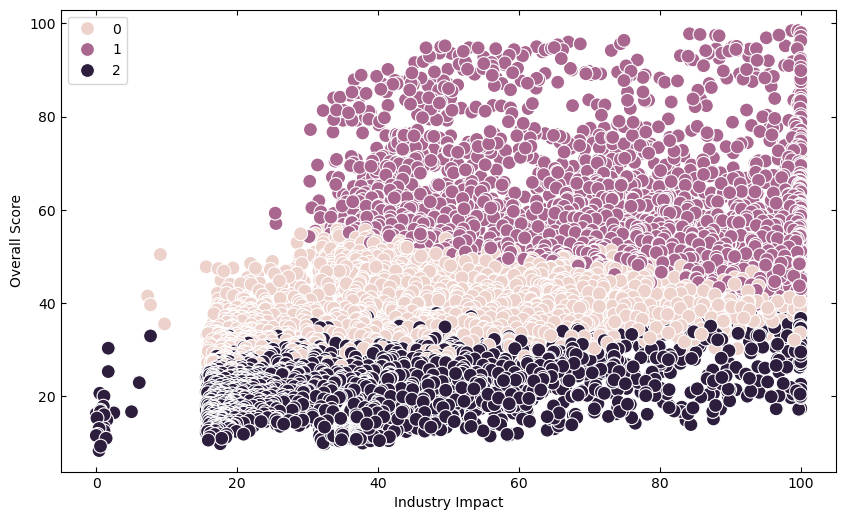

In [25]:
# Plot the clusters for the "Overall Score" and "Industry Impact" variables.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df['Industry Impact'], y=df['Overall Score'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Industry Impact') 
plt.ylabel('Overall Score') 
plt.tick_params(direction='in', top=True, right=True)
plt.show()

#### The Industry Impact alone does not tell us much about the University ranking

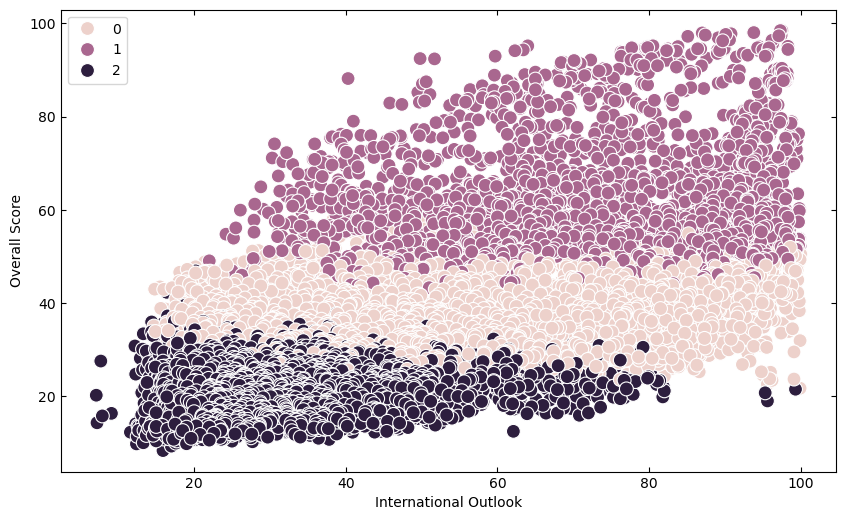

In [26]:
# Plot the clusters for the "Overall Score" and "International Outlook" variables.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df['International Outlook'], y=df['Overall Score'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('International Outlook') 
plt.ylabel('Overall Score') 
plt.tick_params(direction='in', top=True, right=True)
plt.show()

#### International Outlook is a bit more informative. The average and median values increase from cluster 1 (low rank) to cluster 0 (medium rank) and then to cluster 2 (high rank). We will further see this in the Table below.

In [27]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [28]:
df.groupby('cluster').agg({'Teaching':['mean', 'median'], 
                         'Research Environment':['mean', 'median'], 
                         'Research Quality':['mean', 'median'],
                           'Industry Impact':['mean', 'median'],
                            'International Outlook':['mean', 'median'],
                          'Overall Score':['mean', 'median']})

Teaching        Research Environment        Research Quality  \
                  mean median                 mean median             mean   
cluster                                                                      
dark purple  21.750411   20.3            13.867960   12.1        24.495718   
pink         26.316432   25.1            21.694165   20.9        63.858299   
purple       49.354759   45.7            52.670661   47.7        81.084957   

                   Industry Impact        International Outlook         \
            median            mean median                  mean median   
cluster                                                                  
dark purple   23.3       39.488660   37.0             31.996943   29.4   
pink          63.3       43.421411   39.0             55.088885   52.4   
purple        84.3       70.417395   71.6             71.734640   73.4   

            Overall Score          
                     mean  median  
cluster                            
dark purple     21.478033  21.026  
pink            38.871202  38.466  
purple          62.246663  59.130

#### The cluster approach makes perfect sense in this case and allows clearly see tendensies that are characteristics of low-, medium-, and highly-ranked Universities and to identify the variables that are relevant or irrelevant for the university ranking. 

In [29]:
df.to_excel(r'C:\Users\skhra\DataAnalytics\THE_Rating\05-FinalReport\Clustering_data.xlsx', index=False)